# Fuzzy Logic Controller: Automated Ball Shooter

In [1]:
# Import necessary modules

from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import R, S, alpha
from fuzzylogic.functions import (
    trapezoid, triangular_sigmoid, rectangular, triangular)
from math import pi
import itertools
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(5, 5))

## Input Domains

Input is defined by two domains: Proximity and Height.

### Proximity

Proximity is the distance between the ball and the hoop relative to the x-axis. The range of this domain is ranging from -50 to 1,600 in pixels.

#### Universe of Discourse

The universe of discourse for **Proximity** is defined by the following:

* Very near
  - The ball is within the area of the rim.

* Near
  - The ball is approximately 150 pixels away from the rim.

* Somewhat near
  - The ball is appoximately 400 pixels away from the rim.

* Somewhat far
  - The ball is approximately 700 pixels away from the rim.

* Far
  - The ball is approximately 1,100 pixels away from the rim.

* Very far
  - The ball is approximately 1,400 pixels away from the rim.

To visualize this, refer to the graph represented below:

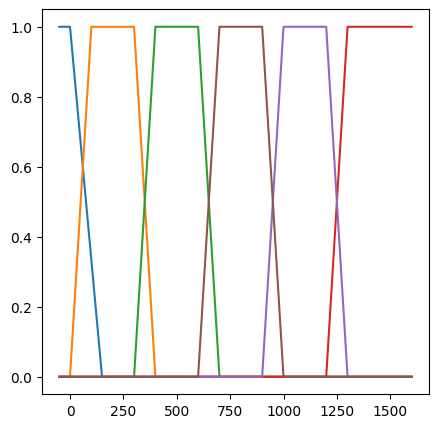

In [11]:
# Proximity Domain
proximity = Domain('Proximity', -50, 1_600)
proximity.vn = S(0, 150)
proximity.n = trapezoid(0, 100, 300, 400)
proximity.sn = trapezoid(300, 400, 600, 700)
proximity.sf = trapezoid(600, 700, 900, 1000)
proximity.f = trapezoid(900, 1000, 1200, 1300)
proximity.vf = R(1200, 1300)

proximity.vn.plot()
proximity.n.plot()
proximity.sn.plot()
proximity.vf.plot()
proximity.f.plot()
proximity.sf.plot()

plt.show()


### Height

Height is the distance between the ball and the hoop relative to the y-axis. The range of this domain is ranging from -550 to 550 in pixels.

#### Universe of Discourse

The universe of discourse for **Height** is defined by the following:

* Very Under
  - The ball is way above the rim.

* Somewhat Under
  - The ball is mildly above the rim.

* Under
  - The ball is slightly above the rim.

* Exact
  - The ball is aligned with the rim.

* Low
  - The ball is slightly under the rim.

* Low Mid
  - The ball is mildly under the rim.

* Mid
  - The rim is in the center of the canvas where the ball is on the floor.

* High Mid
  - The rim is slightly above the middle of the canvas where the ball is on the floor.

* High
  - The rim is way above the canvas where the ball is on the floor.

To visualize this, refer to the graph represented below:

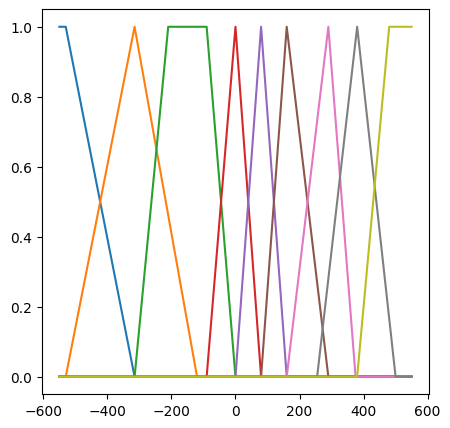

In [12]:
# Height Domain
height = Domain('Height', -550, 550)
height.vu = S(-530, -315)
height.su = triangular(-530, -120, c=-315)
height.u = trapezoid(-315, -210, -90, 0)
height.exact = triangular(-90, 80, c=0)
height.low = triangular(0, 160, c=80)
height.low_mid = triangular(80, 290, c=160)
height.mid = triangular(160, 375, c=290)
height.high_mid = triangular(255, 500, c=380)
height.high = R(380, 480)

height.vu.plot()
height.su.plot()
height.u.plot()
height.exact.plot()
height.low.plot()
height.low_mid.plot()
height.mid.plot()
height.high_mid.plot()
height.high.plot()

plt.show()

## Output Domains

The output of the fuzzy input are defined by two domains: Trajectory and Magnitude.

### Trajectory

This is the angle that the ball will face. This domain ranges from 0 to 90° (π / 2). Although, these values are simply mapped from 0 to 5.

#### Universe of Discourse

The universe of discourse for **Trajectory** is defined by the following:

* None
  - The ball will angle itself to 0°

* Low
  - The ball will angle itself to 18°

* Low Mid
  - The ball will angle itself to 36°

* Mid
  - The ball will angle itself to 54°

* High Mid
  - The ball will angle itself to 72°

* High
  - The ball will angle itself to 90°

To visualize this, refer to the graph represented below:

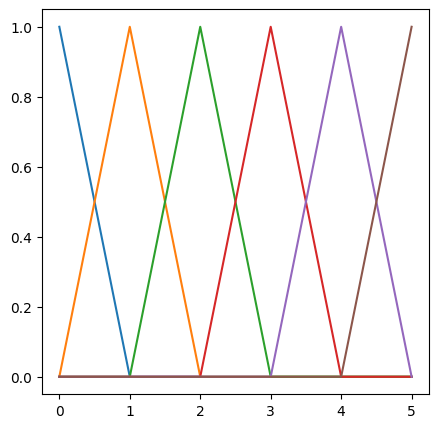

In [13]:
# Trajectory Domain
trajectory = Domain('Trajectory', 0, 5)
trajectory.none = S(0, 1)
trajectory.low = triangular(0, 2, c=1)
trajectory.low_mid = triangular(1, 3, c=2)
trajectory.mid = triangular(2, 4, c=3)
trajectory.high_mid = triangular(3, 5, c=4)
trajectory.high = R(4, 5)

trajectory.none.plot()
trajectory.low.plot()
trajectory.low_mid.plot()
trajectory.mid.plot()
trajectory.high_mid.plot()
trajectory.high.plot()

plt.show()


### Magnitude

This is the amount of force to be applied to the ball to reach the rim. The force to be applied at 100% is an arbitrary value of **2** assuming that the system can only output a maximum force of 2 newtons (or in this case, pixels/dots per inch). This arbitrary value is calculated by simulating the ball and the rim farthest as they can in terms of proximity and height and the value **2** is the value where the ball can reach the rim at best.

#### Universe of Discourse

The universe of discourse for **Magnitude** is defined by the following:

* None
  - The force applied will be 0 DPI

* Weak
  - The force applied will be 0.5 DPI

* Ample
  - The force applied will be 1 DPI

* Strong
  - The force applied will be 1.5 DPI

* Powerful
  - The force applied will be 2 DPI

To visualize this, refer to the graph represented below:

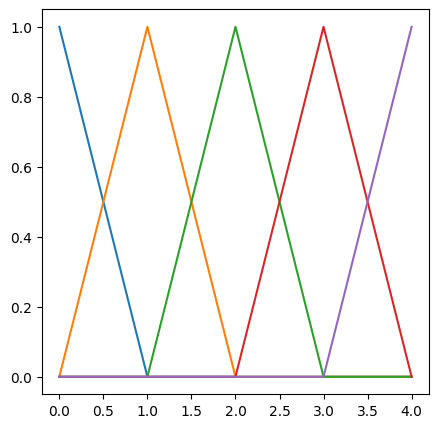

In [14]:
# Magnitude Domain
magnitude = Domain('Magnitude', 0, 4)
magnitude.none = S(0, 1)
magnitude.weak = triangular(0, 2, c=1)
magnitude.ample = triangular(1, 3, c=2)
magnitude.strong = triangular(2, 4, c=3)
magnitude.powerful = R(3, 4)

magnitude.none.plot()
magnitude.weak.plot()
magnitude.ample.plot()
magnitude.strong.plot()
magnitude.powerful.plot()

plt.show()